#Importing Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

## Extract the dataset from a ZIP file

In [4]:
# Extract dataset
dataset_path = "animal_data.zip"
data_dir = "animal_data"
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

### Set the path to the dataset and define the class labels

In [5]:
data_path = os.path.join(data_dir, 'animal_data')
labels = ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


### Prepare the DataFrame to store image paths and corresponding labels

In [6]:
# Prepare DataFrame
data = pd.DataFrame(columns=['path', 'label'])
for lbl in labels:
    img_dir = os.path.join(data_path, lbl)
    imgs = glob(f"{img_dir}/*.jpg")
    temp_df = pd.DataFrame({"path": imgs, "label": lbl})
    data = pd.concat([data, temp_df], ignore_index=True)

### Visualize a sample of images

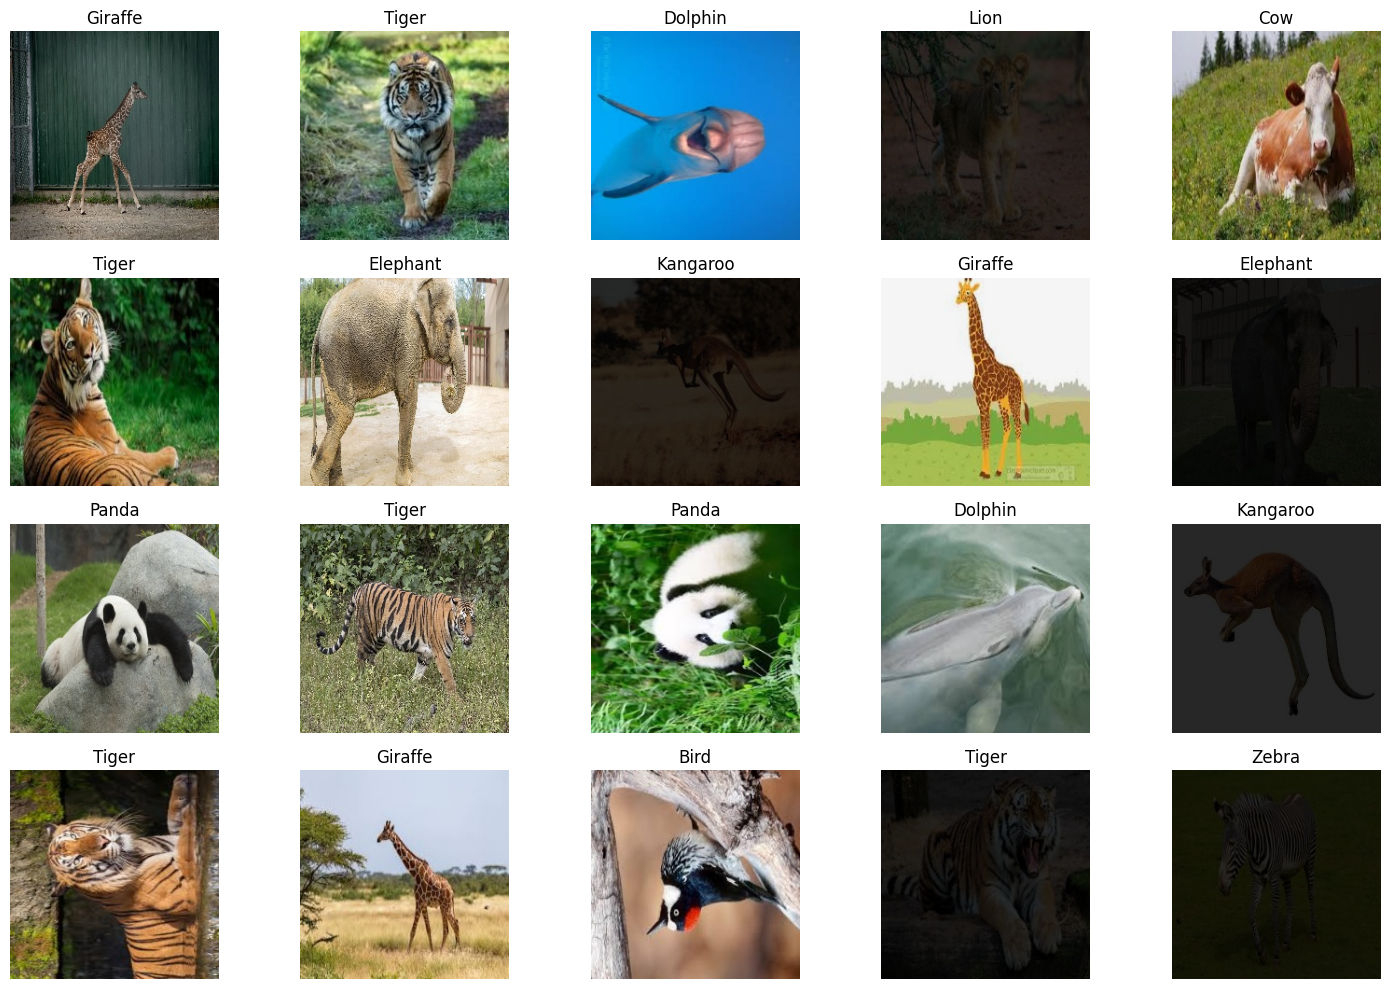

In [7]:
# Visualize some data
sample_imgs = 20
sample_idxs = np.random.choice(len(data), sample_imgs, replace=False)
fig, axs = plt.subplots(sample_imgs // 5, 5, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    img_path = data.loc[sample_idxs[i], 'path']
    ax.imshow(plt.imread(img_path))
    ax.set_title(data.loc[sample_idxs[i], 'label'])
    ax.axis('off')
plt.tight_layout()
plt.show()

## Preprocess the images (resize and normalize)

In [8]:
# Preprocess images
def preprocess(img_paths):
    imgs = []
    for path in img_paths:
        img = load_img(path, target_size=(128, 128))
        img_arr = img_to_array(img) / 255.0
        imgs.append(img_arr)
    return np.array(imgs)

 ##Preprocess all images and store in X and converting labels to one-hot encoding

In [9]:
X = preprocess(data['path'])
y = pd.get_dummies(data['label']).values

## Split the dataset into training, validation, and test sets

In [10]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)


## Build a convolutional neural network (CNN) model and compiling it

In [11]:
# Build improved model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),

    Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),

    Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,486,863 (32.37 MB)

 Trainable params: 8,486,415 (32.37 MB)

 Non-trainable params: 448 (1.75 KB)

## Training the model

In [12]:
# Train model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=64)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.1331 - loss: 15.0250 - val_accuracy: 0.0667 - val_loss: 5.0532
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.2009 - loss: 2.7897 - val_accuracy: 0.0848 - val_loss: 12.8542
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.1492 - loss: 2.5756 - val_accuracy: 0.0909 - val_loss: 19.6813
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.1966 - loss: 2.5212 - val_accuracy: 0.0667 - val_loss: 25.3613
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.1986 - loss: 2.3948 - val_accuracy: 0.0545 - val_loss: 29.6079
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.2096 - loss: 2.3353 - val_accuracy: 0.0788 - val_loss: 25.9855
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.2200 - loss: 2.3284 - val_accuracy: 0.0545 - val_loss: 36.5922
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.2331 - loss: 2.3392 - val_accuracy: 0.0606 -

## Evaluate the model on the test set

In [13]:
# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.4594 - loss: 1.8281
Test Loss: 1.8538, Test Accuracy: 45.45%


## Plot training and validation accuracy and loss

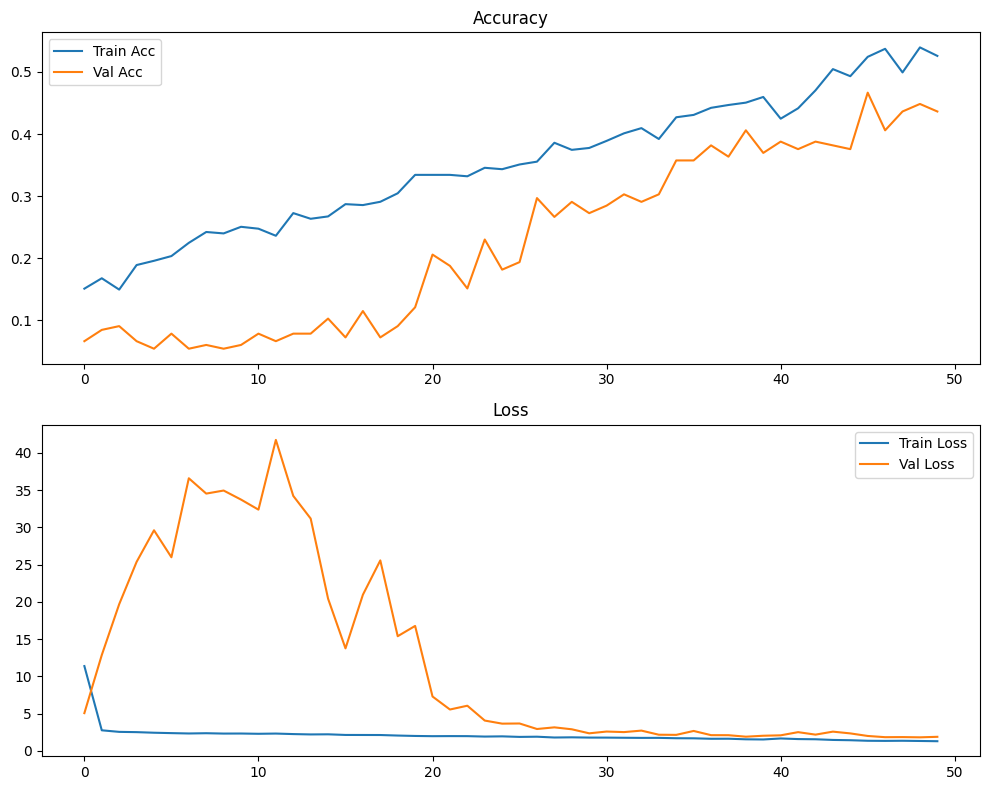

In [14]:
# Plot accuracy and loss
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(history.history['accuracy'], label='Train Acc')
axs[0].plot(history.history['val_accuracy'], label='Val Acc')
axs[0].set_title('Accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Val Loss')
axs[1].set_title('Loss')
axs[1].legend()
plt.tight_layout()
plt.show()


## Predict on a few test samples and visualize the results

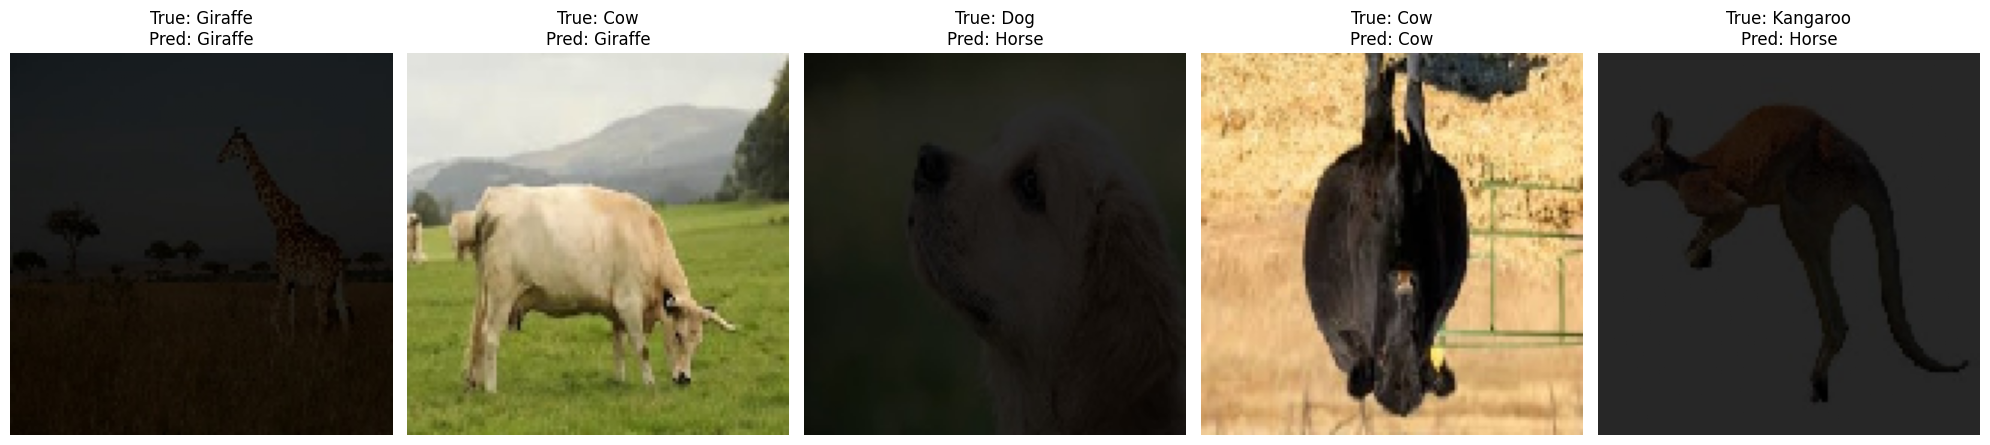

In [15]:
# Predict on test samples
n_samples = 5
sample_idxs = np.random.choice(len(X_test), n_samples, replace=False)
fig, axs = plt.subplots(1, n_samples, figsize=(20, 5))
for i, idx in enumerate(sample_idxs):
    pred = model.predict(X_test[idx].reshape(1, 128, 128, 3), verbose=0)[0]
    pred_label = labels[np.argmax(pred)]
    true_label = labels[np.argmax(y_test[idx])]
    axs[i].imshow(X_test[idx])
    axs[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axs[i].axis('off')
plt.tight_layout()
plt.show()